In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from openLoop.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import openLoop.math.dispatched as dmath 
#import openLoop.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import openLoop.utilities.version as version
print(version.foundations_version())

from openLoop.utilities.np import logspaced

from openLoop import optics
from openLoop import base 
from openLoop import signals 
from openLoop import system
from openLoop import readouts 
import numpy as np

b'2017-05-22 18:00:30 -0400 (650e8b42ac15ae72d523377520c98ca8637a2e99)'


In [4]:
N_poles_r = 3
N_zeros_r = 3
N_poles_c = 3
N_zeros_c = 3
def gen_pzgd(
):
    poles_r = -np.exp(np.random.uniform(0, np.log(1000), N_poles_r))
    zeros_r = -np.exp(np.random.uniform(0, np.log(1000), N_zeros_r))
    poles_c = (
        -np.exp(np.random.uniform(0, np.log(100), N_poles_c))
        +1j*np.exp(np.random.uniform(0, np.log(1000), N_poles_c))
    )
    zeros_c = (
        -np.exp(np.random.uniform(0, np.log(100), N_zeros_c))
        +1j*np.exp(np.random.uniform(0, np.log(1000), N_zeros_c))
    )
    delay_s = None#np.random.uniform(0, .0001)
    gain = np.exp(np.random.uniform(0.1, np.log(1000)))
    return dict(
        poles_r = tuple(poles_r),
        zeros_r = tuple(zeros_r),
        poles_c = tuple(poles_c),
        zeros_c = tuple(zeros_c),
        delay_s = delay_s,
        gain = gain,
    )

def match_pzgd():
    d = gen_pzgd()
    return dict(
        poles_r = d['poles_r'],
        zeros_r = d['poles_r'],
        poles_c = d['poles_c'],
        zeros_c = d['poles_c'],
        delay_s = d['delay_s'],
        gain = d['gain'],
    )
    
def perturb_pzgd(
    poles_r,
    zeros_r,
    poles_c,
    zeros_c,
    delay_s,
    gain,
):
    poles_r = np.asarray(poles_r) * (1 + np.exp(np.random.uniform(-.5, 1.5, N_poles_r)))
    zeros_r = np.asarray(zeros_r) * (1 + np.exp(np.random.uniform(-.5, 1.5, N_zeros_r)))
    poles_c = np.asarray(poles_c) * (
        np.random.uniform(.1, 2, N_poles_c)
    ) + (
        +1j*np.exp(np.random.uniform(0, np.log(100), N_poles_c))
    )
    zeros_c = np.asarray(zeros_c) + (
         np.random.uniform(.1, 2, N_zeros_c)
    ) + (
        +1j*np.exp(np.random.uniform(0, np.log(100), N_zeros_c))
    )
    delay_s = None#np.random.uniform(0, .0001)
    gain = np.exp(np.random.uniform(0.1, np.log(1000)))
    return dict(
        poles_r = tuple(poles_r),
        zeros_r = tuple(zeros_r),
        poles_c = tuple(poles_c),
        zeros_c = tuple(zeros_c),
        delay_s = delay_s,
        gain = gain,
    )

np.random.uniform(0, 1)
gen_pzgd()

{'delay_s': None,
 'gain': 21.229236173343303,
 'poles_c': ((-54.277702517757291+22.641942171639897j),
  (-3.1076585106729713+19.024790141275076j),
  (-10.243872392524889+32.898129002866085j)),
 'poles_r': (-420.07793887589065, -890.13459597082078, -1.2303346287584587),
 'zeros_c': ((-2.7141716492766936+180.43606995729823j),
  (-27.891305168238752+3.1530324310695939j),
  (-7.373876989874228+1.6199302179267761j)),
 'zeros_r': (-7.7667720291797728, -80.328898241199838, -34.27846470782773)}

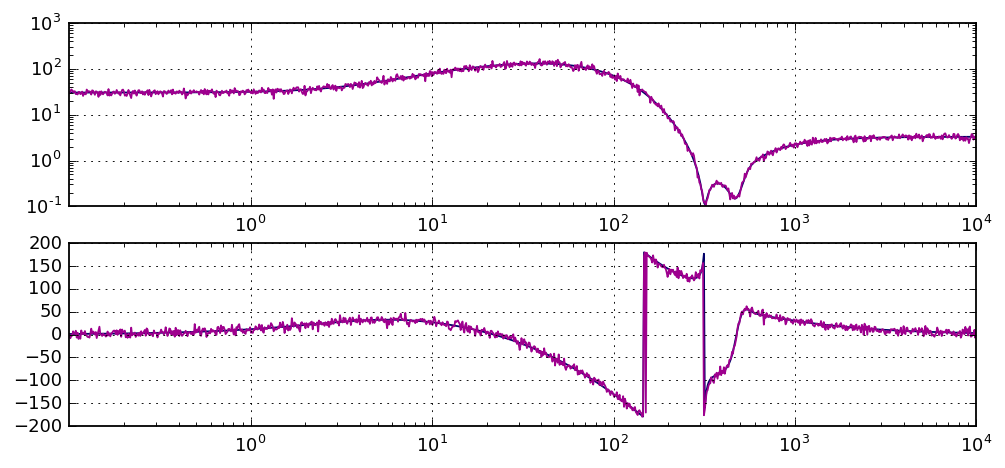

In [5]:
sys = system.BGSystem(
    F_AC = logspaced(0.1, 10000, 1000)
)
orig_pzgd = gen_pzgd()
sys.own.X1 = signals.SRationalFilter(
    **orig_pzgd
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.Out.o,
    portD = sys.X1.In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

size = len(readoutI.F_Hz.val)
relscale = .1
AC_data = readoutI.AC_sensitivity * (1 
                                     + np.random.normal(0, relscale, size) 
                                     + 1j*np.random.normal(0, relscale, size))
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True))

#print(sys.X1.ctree_as_yaml())

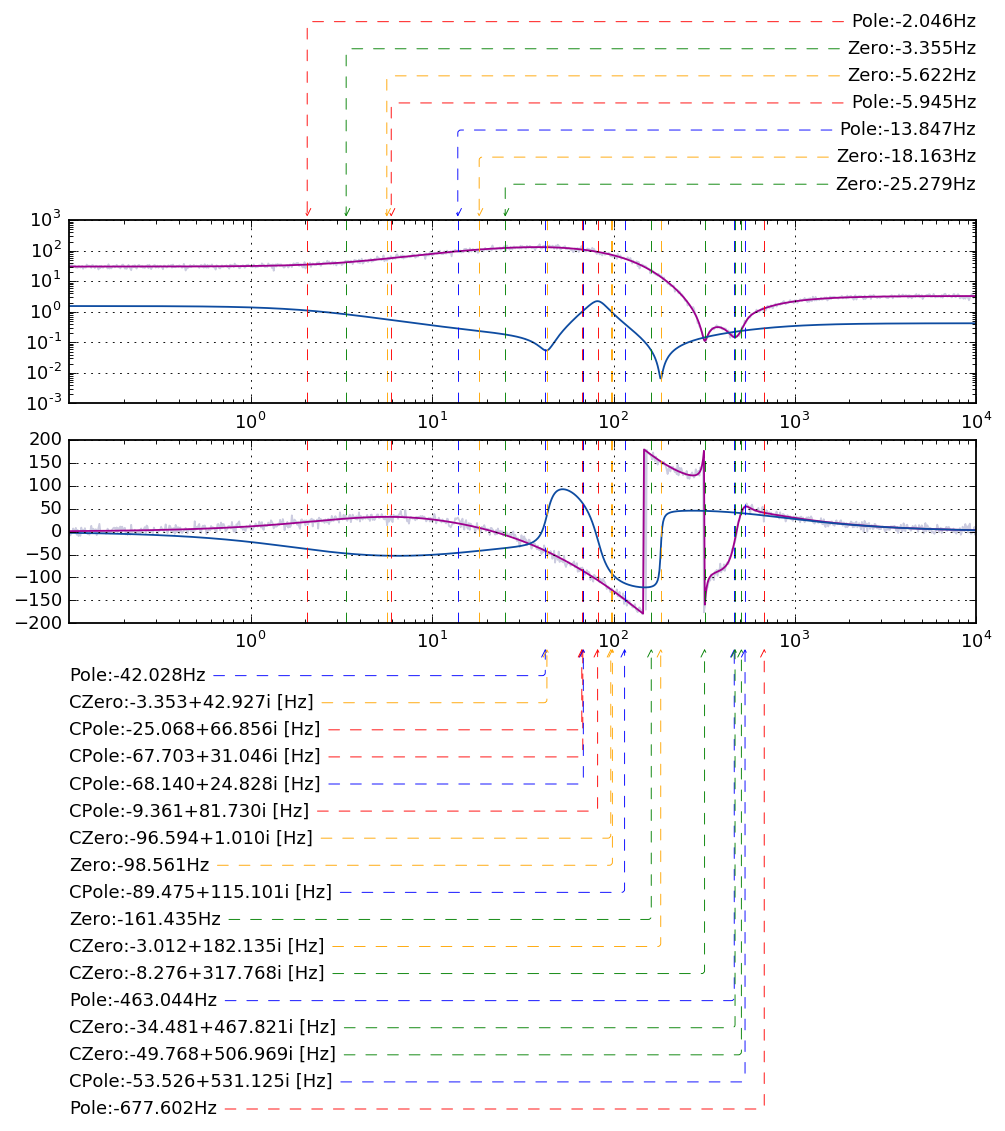

In [6]:
sys_fit = system.BGSystem(
    F_AC = sys.F_AC.F_Hz.val
)
sys_fit.own.X1 = signals.SRationalFilter(
    #**perturb_pzgd(**orig_pzgd)
    **gen_pzgd()
)
sys_fit.own.R1 = readouts.ACReadout(
    portN = sys.X1.Out.o,
    portD = sys.X1.In.i,
)

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.R1.F_Hz.val, abs(AC_data), alpha = .2)
Fb.ax1.semilogx(sys.R1.F_Hz.val, np.angle(AC_data, deg = True), alpha = .2)

readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

readoutI =  sys_fit.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

from openLoop.signals.plot.ZPK_plot import ZPKAnnotator
anno = ZPKAnnotator(
    style_poles = dict(
        color = 'red'
    ),
    style_zeros = dict(
        color = 'orange'
    ),
)
anno_orig = ZPKAnnotator(
    style_poles = dict(
        color = 'blue'
    ),
    style_zeros = dict(
        color = 'green'
    ),
)
desc_by_x =  anno_orig.annolist(
    poles_r = sys.X1.poles_r,
    poles_c = sys.X1.poles_c,
    zeros_r = sys.X1.zeros_r,
    zeros_c = sys.X1.zeros_c,
)
desc_by_x2 =  anno.annolist(
    poles_r = sys_fit.X1.poles_r,
    poles_c = sys_fit.X1.poles_c,
    zeros_r = sys_fit.X1.zeros_r,
    zeros_c = sys_fit.X1.zeros_c,
)
anno.annotate(
    fB = Fb,
    desc_by_x = desc_by_x + desc_by_x2,
)

In [8]:
import openLoop.fitting.casadi as FIT
import openLoop.fitting.casadi.transfer_functions as FIT_TF
froot = FIT.FitterRoot()
froot.own.sym = FIT.FitterSym()
froot.systems.xfer = sys_fit
froot.sym.parameter(sys_fit.X1)
froot.own.fit_xfer = FIT_TF.TransferACExpression(
    ACReadout = sys_fit.R1,
    ACData = AC_data,
    SNR_weights = 1/relscale,
    residuals_model = 'magnitude',
    max_cpu_time = 15,
)

froot2 = froot.fit_xfer.minimize_function()

frootX = FIT.FitterRoot()
frootX.own.sym = FIT.FitterSym()
frootX.systems.xfer = froot2.systems.xfer
frootX.sym.parameter(froot2.systems.xfer.X1)
frootX.own.fit_xfer = FIT_TF.TransferACExpression(
    ACReadout = froot2.systems.xfer.R1,
    ACData = AC_data,
    SNR_weights = 1/relscale,
    residuals_model = 'subtract',
    max_cpu_time = 15,
)

froot2 = frootX.fit_xfer.minimize_function()



frootX = FIT.FitterRoot()
frootX.own.sym = FIT.FitterSym()
frootX.systems.xfer = froot2.systems.xfer
frootX.sym.parameter(froot2.systems.xfer.X1)
frootX.own.fit_xfer = FIT_TF.TransferACExpression(
    ACReadout = froot2.systems.xfer.R1,
    ACData = AC_data,
    SNR_weights = 1/relscale,
    residuals_model = 'direct',
)

froot2 = frootX.fit_xfer.minimize_function()


Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.R1.F_Hz.val, abs(AC_data), alpha = .2)
Fb.ax1.semilogx(sys.R1.F_Hz.val, np.angle(AC_data, deg = True), alpha = .2)

readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

readoutI =  sys_fit.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

readoutI =  froot2.systems.xfer.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

RuntimeError:  on line 165 of file "/home/mcculler/daylog/2017-01-03/casadi-3.1.1-1.fc25/BUILD/casadi-3.1.1/casadi/core/mx/mx_node.cpp"
Can only determine truth value of a numeric MX.


NameError: name 'froot2' is not defined

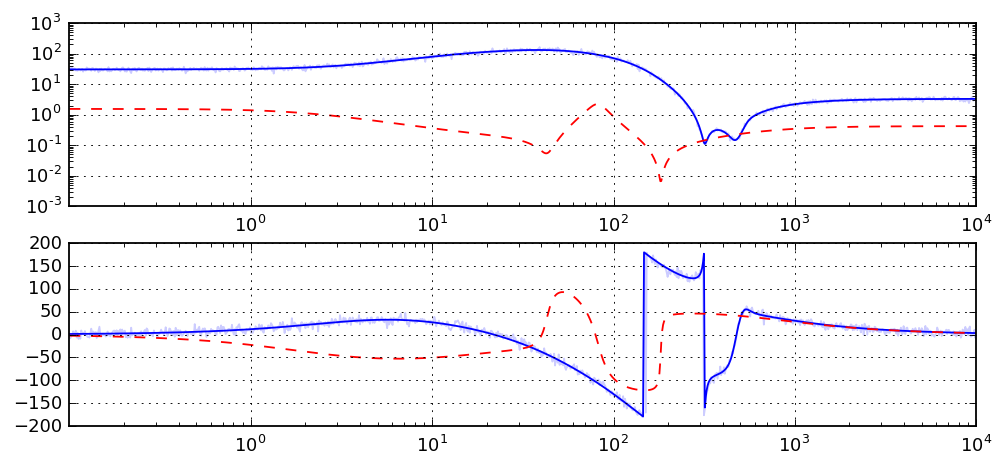

In [9]:
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(
    sys.R1.F_Hz.val,
    abs(AC_data),
    alpha = .2,
    color = 'blue',
)
Fb.ax1.semilogx(
    sys.R1.F_Hz.val,
    np.angle(AC_data, deg = True),
    alpha = .2,
    color = 'blue',
)

readoutI =  sys.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'blue',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'blue',
)

readoutI =  sys_fit.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'red',
    ls = '--',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'red',
    ls = '--',
)

readoutI =  froot2.systems.xfer.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'green',
    ls = '--',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'green',
    ls = '--',
)

desc_by_x =  anno_orig.annolist(
    poles_r = sys.X1.poles_r,
    poles_c = sys.X1.poles_c,
    zeros_r = sys.X1.zeros_r,
    zeros_c = sys.X1.zeros_c,
)
desc_by_x2 =  anno.annolist(
    poles_r = froot2.systems.xfer.X1.poles_r,
    poles_c = froot2.systems.xfer.X1.poles_c,
    zeros_r = froot2.systems.xfer.X1.zeros_r,
    zeros_c = froot2.systems.xfer.X1.zeros_c,
)
anno.annotate(
    fB = Fb,
    desc_by_x = desc_by_x + desc_by_x2,
)

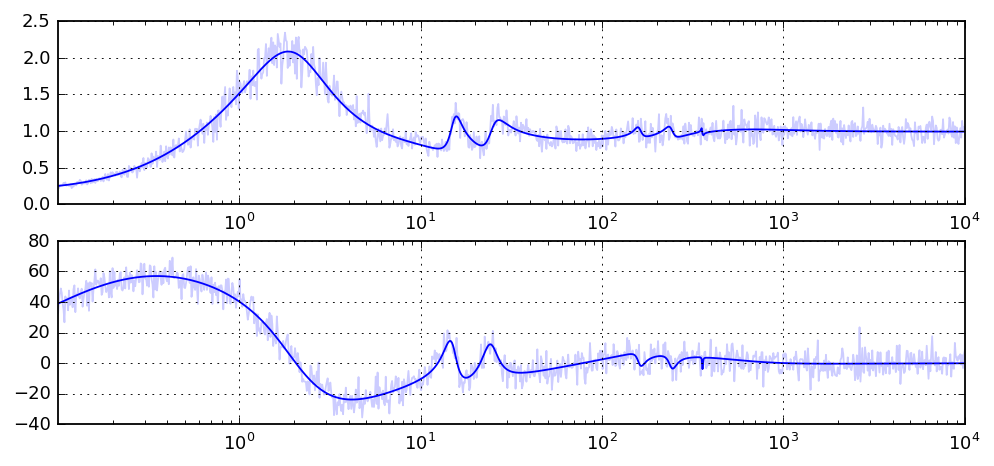

In [10]:
readout =  sys.R1
fit_readout =  froot2.systems.xfer.R1

Fb = mplfigB(Nrows=2)
Fb.ax0.semilogx(
    sys.R1.F_Hz.val,
    abs(AC_data / fit_readout.AC_sensitivity),
    alpha = .2,
    color = 'blue',
)
Fb.ax1.semilogx(
    sys.R1.F_Hz.val,
    np.angle(AC_data / fit_readout.AC_sensitivity, deg = True),
    alpha = .2,
    color = 'blue',
)

Fb.ax0.semilogx(
    readout.F_Hz.val,
    abs(readout.AC_sensitivity / fit_readout.AC_sensitivity),
    color = 'blue',
)
Fb.ax1.semilogx(
    readout.F_Hz.val,
    np.angle(readout.AC_sensitivity / fit_readout.AC_sensitivity, deg = True),
    color = 'blue',
)

Fb.ax_list


In [11]:
sys.ctree.X1

ShadowBunchN([DeepBunchSingleAssign(
        'no_DC' = False,
        'poles_c' = {'0': (-1.6833642231058246+357.06565829412631j),
         '1': (-14.727642794042117+239.88815421692763j),
         '2': (-1.1510525979539468+1.6355142832563265j)},
        'poles_r' = {'0': -754.77034179132693,
         '1': -1.1169159852735224,
         '2': -26.919502908888862},
        'preserve_plane' = True,
        'zeros_c' = {'0': (-9.8482998013461618+160.85060104613393j),
         '1': (-1.8184040867596307+14.584248376994132j),
         '2': (-3.1252952596275057+23.352363762224247j)},
        'zeros_r' = {'0': -703.64408968893815,
         '1': -223.21618474296162,
         '2': -31.491081872295204},
        )
    DeepBunchSingleAssign(
        'delay' = {'units': 'second', 'val': None},
        'gain' = 3.1848746993273784,
        )
    ])

In [12]:
dict().update({}).update({})

AttributeError: 'NoneType' object has no attribute 'update'

In [21]:
2 * (1 - np.tanh(2))

0.071944839848366193